In [31]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from Assignment_1.Assignment_1.Part_2_aero_design_functions import single_point_design, get_design_functions
from lacbox.io import load_ae, save_ae
from lacbox.test import test_data_path


In [32]:
"""Test single point design with a decrease in blade length"""

'Test single point design with a decrease in blade length'

In [33]:
"""List of changes to blade"""
"1: blade length reduced from original scale ratio 1.0388 -> 1.0194"
"2: tsr is changed based on single point design function 2 optimal tsr"
"3: Biggest blade chord is kept the same as DTU -> traveling constraint"
"4: tsr is chosen based on HAWC2S optimal"

'4: tsr is chosen based on HAWC2S optimal'

In [34]:
scale_ratio_blade = 1.0194 # NEW SCALE RATIO OF THE BLADE JIM_DESIGN

In [35]:
def read_data(file_path):
    """Reads a data file and extracts three columns of float data."""
    column_1, column_2, column_3 = [], [], []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue
            try:
                if ';' in line:
                    line = line.split(';')[0]  # Remove comments
                values = list(map(float, line.split()))
                if len(values) >= 3:
                    column_1.append(values[0])
                    column_2.append(values[1])
                    column_3.append(values[2])
            except ValueError:
                continue  # Skip lines with invalid data
    return np.array(column_1), np.array(column_2), np.array(column_3)

def plot_cp_ct(tsr_values, cp_list, ct_list, label="Design"):
    """Plots CP and CT as a function of TSR."""
    fig, ax = plt.subplots(2, 1, figsize=(6, 8))

    # Plot CP vs TSR
    ax[0].plot(tsr_values, cp_list, 'o-', label=f"{label} $C_P$")
    ax[0].set_ylabel("$C_P$ [-]")
    ax[0].set_xlabel("TSR [-]")
    ax[0].grid(True)
    ax[0].set_title(f"Power Coefficient vs TSR ({label})")
    ax[0].legend()

    # Plot CT vs TSR
    ax[1].plot(tsr_values, ct_list, 'o-', label=f"{label} $C_T$")
    ax[1].set_ylabel("$C_T$ [-]")
    ax[1].set_xlabel("TSR [-]")
    ax[1].grid(True)
    ax[1].set_title(f"Thrust Coefficient vs TSR ({label})")
    ax[1].legend()

    fig.tight_layout()
    plt.show()

def run_design(tsr_values, design_function_int=2.0, plot_comparison=False):
    """Runs the single-point design for a range of TSR values and plots CP and CT (new design)."""

    # File path and scaling factor for new design
    ae_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_ae.dat'
    
    
    """NEW SCALE RATIO OF THE BLADE HERE"""
    # scale_ratio_blade = 1.0194 

    """IDENTICAL TO OLD EXCEPT MAINTAIN MAX CHORD AS DTU """
    # Read new design data
    r, c_10mw, tc_10mw = read_data(ae_path)
    c_10mw *= scale_ratio_blade
    c_10mw[:4] = 5.38  # First 4 values of our design maintain identical chord
    c_10mw[4] = 5.386
    c_10mw[5] = 5.5
    t_10mw = tc_10mw[:-1] / 100 * c_10mw[:-1]
    r *= scale_ratio_blade

    r_hub = 2.8  # Hub radius [m]
    R = r_hub + r[-1]  # Rotor radius [m]
    r = r[:-1] + r_hub  # Adjust rotor span with hub radius
    
    """MAINTAINING DTU MAX CHORD"""
    # Max and root chord sizes
    chord_max = 6.20 
    chord_root = 5.38
    B = 3  # Number of blades

    # Aerodynamic polar design functions
    cl_des, cd_des, aoa_des, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions(design_function_int)

    # Loop through different TSR values and plot results
    cp_list, ct_list = [], []

    for tsr in tsr_values:
        # print(f"Running new design for TSR = {tsr}")

        # Perform the design for the current TSR
        chord, tc, twist, cl, cd, aoa, a, CLT, CLP, CT, CP = single_point_design(
            r, t_10mw, tsr, R, cl_des, cd_des, aoa_des, chord_root, chord_max, B
        )

        # Store CP and CT values
        cp_list.append(CP)
        ct_list.append(CT)
    
    print(max(cp_list))
    index_max = cp_list.index(max(cp_list))
    print(f"Maximum tsr  ={tsr_values[index_max]}")

    # Plot CP and CT for new design
    if not plot_comparison:
        plot_cp_ct(tsr_values, cp_list, ct_list, label="New Design")
    return cp_list, ct_list  # Return for potential comparison

0.4597697976118447
Maximum tsr  =7.1313131313131315


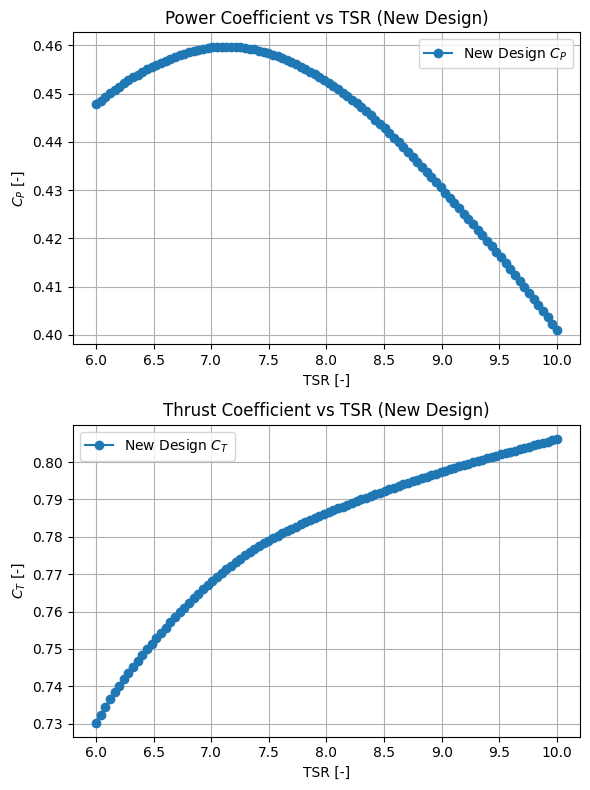

([0.44775658291301845,
  0.44855564365721484,
  0.4493253308878972,
  0.4500672753578773,
  0.45078273083122294,
  0.4514714553345139,
  0.4521329309168315,
  0.45276634192948056,
  0.45337097161142714,
  0.4539488430809902,
  0.4545001271996373,
  0.45502547164348156,
  0.45552453705440904,
  0.4559982157262216,
  0.45644580619811714,
  0.4568679206595666,
  0.45726370630249147,
  0.4576335308508117,
  0.45797646465859304,
  0.45829238501753145,
  0.45858048607657637,
  0.45884085523905355,
  0.4590733148803489,
  0.45927759378712685,
  0.4594535410378104,
  0.4595920899894314,
  0.45969019496199526,
  0.45974891203035695,
  0.4597697976118447,
  0.4597542096804983,
  0.45970322184710116,
  0.4596176551895546,
  0.45949828844425783,
  0.45934533455877924,
  0.45915970099043674,
  0.45894126086818615,
  0.4586911279102827,
  0.45840921061151196,
  0.45809648645083345,
  0.4577533386254614,
  0.4573800814202126,
  0.45697834766245876,
  0.45654821096912673,
  0.4560904238203763,
  0.455

In [36]:
# Define a range of TSR values to test
tsr_values = np.linspace(6, 10, 100)  # Example range of TSR values

# Run the comparison of old and new designs
run_design(tsr_values, design_function_int=2)

In [37]:
"""Updating this file to change parameters for new blade design"""

"""See line 58, removed scale ratio blade"""

ae_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_ae.dat'

In [38]:
""""""
tsr_max_cp = 7.13
# File path and scaling factor for new design
file_path = Path.cwd() / 'DTU_10MW_RWT_Assignment_1_ae.dat'
scale_ratio_blade = 1.0388359746215876

ae_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_ae.dat'

ae = load_ae(ae_path)

# Read new design data
r, c_10mw, tc_10mw, pcset = load_ae(ae_path, unpack=True)
# c_10mw *= scale_ratio_blade
c_10mw[:4] = 5.38  # First 4 values of our design maintain identical chord
c_10mw[4] = 5.386
c_10mw[5] = 5.5
t_input = tc_10mw[:-1] / 100 * c_10mw[:-1]
r *= scale_ratio_blade

print(c_10mw.argmax())

12


In [39]:
r_hub = 2.8  # Hub radius [m]
R = r_hub + r[-1]  # Rotor radius [m]
# print(R)
r_with_hub = r[:-1] + r_hub  # Adjust rotor span with hub radius

# Max and root chord sizes
chord_max = 6.20 #* scale_ratio_blade
chord_root = 5.38
B = 3  # Number of blades

# Aerodynamic polar design functions
cl_des, cd_des, aoa_des, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions(2)

# Perform the design for the TSR_max_cp
chord_BB, tc_BB, twist_BB, cl, cd, aoa, a, CLT, CLP, CT, CP = single_point_design(
    r_with_hub, t_input, tsr_max_cp, R, cl_des, cd_des, aoa_des, chord_root, chord_max, B
        )

In [40]:

print(tc_BB)

# Define output file path for the updated .dat file
# output_file_path = Path.cwd() / 'JIM_DESIGN_BB_RWT_design.dat'

# print(len(r))
# print(r[-1])
# print(len(chord_BB))
# print(len(tc_BB))

# Write the updated data into the new .dat file

save_path = 'JIM_DESIGN_RWT_Blade_ae.dat'

# Convert numpy arrays to lists
chord_BB_list = chord_BB.tolist()
tc_BB_list = tc_BB.tolist()

"""Last element of the blade is interpolation of the previous element. """
# Perform linear fit for the last 5 elements of both chord_BB and tc_BB
last_5_indices = np.arange(len(chord_BB_list) - 5, len(chord_BB_list))

# Linear fit for chord_BB
chord_fit_coeff = np.polyfit(last_5_indices, chord_BB_list[-5:], 1)
next_index = len(chord_BB_list)
next_chord_value = np.polyval(chord_fit_coeff, next_index)  # Predict the next value


chord_BB_list.append(next_chord_value)
tc_BB_list.append(tc_BB_list[-1])

# Update the ae_new array with the new lists
ae_new = ae.copy()
ae_new[:, 0] = r  # Update radii
ae_new[:, 1] = np.array(chord_BB_list)  # Convert the list back to numpy array for assignment
ae_new[:, 2] = np.array(tc_BB_list)  # Convert the list back to numpy array for assignment

# Print updated data for verification
# print(ae_new)

# print(ae_new)

# Save the updated aerodynamic design data to a new file
save_ae(save_path, ae_new)

# print(tc_BB)
# print(r)
np.savetxt('tc_BB',tc_BB)
np.savetxt('Cl_single_point_design', cl)


[100.          99.70935514  95.49130103  93.50215969  90.46425622
  87.74865071  81.37121851  75.14194238  67.92461233  60.13786302
  52.61263766  46.24052307  41.19052343  37.31559163  34.27231472
  31.98596583  30.48747764  29.81261318  29.40799058  28.95153513
  28.46611106  27.96957225  27.47590286  26.99768211  26.53968551
  26.10597879  25.66419422  25.20039237  24.75909965  24.40025332
  24.2057565   24.2057565   24.2057565   24.2057565   24.2057565
  24.2057565   24.2057565   24.2057565   24.2057565 ]


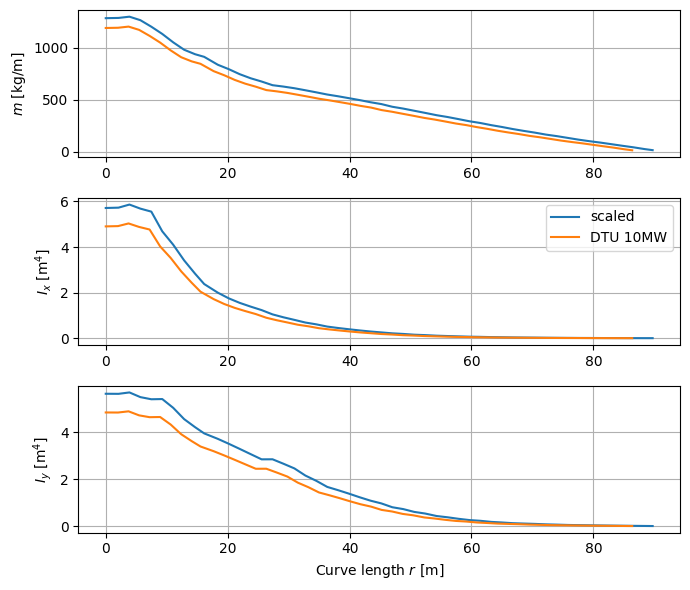

In [41]:
"""Script/module for scaling the HAWC2 ST-data

The file can be run directly which shows an example of how to scale the ST-data
The file can also be imported as a module where the `scale_ST_data` can be used in another script/notebook
"""
from pathlib import Path

import lacbox.io

def scale_ST_data(baseline_st_data, scale_factor):
    """Applying scaling for a baseline HAWC2 ST-file.

    Parameters
    ----------
    baseline_st_data : dict
        Dict containing the baseline ST-data. The ST-data can be loaded with `lacbox.load_st`
    scale_factor : float
        Scaling factor to apply for the ST-data. If scaling factor is using rotor span it can be computed as: `scale_factor = R_new/R_old`

    Returns
    -------
    dict
        The scaled ST-data. Can be written to file with `lacbox.save_st`
    """
    st_data = dict()
    st_data["s"] = baseline_st_data["s"] * scale_factor
    st_data["m"] = baseline_st_data["m"] * scale_factor**2
    st_data["x_cg"] = baseline_st_data["x_cg"] * scale_factor
    st_data["y_cg"] = baseline_st_data["y_cg"] * scale_factor
    st_data["ri_x"] = baseline_st_data["ri_x"] * scale_factor
    st_data["ri_y"] = baseline_st_data["ri_y"] * scale_factor
    st_data["x_sh"] = baseline_st_data["x_sh"] * scale_factor
    st_data["y_sh"] = baseline_st_data["y_sh"] * scale_factor
    st_data["E"] = baseline_st_data["E"]
    st_data["G"] = baseline_st_data["G"]
    st_data["I_x"] = baseline_st_data["I_x"] * scale_factor**4
    st_data["I_y"] = baseline_st_data["I_y"] * scale_factor**4
    st_data["I_p"] = baseline_st_data["I_p"] * scale_factor**4
    st_data["k_x"] = baseline_st_data["k_x"]
    st_data["k_y"] = baseline_st_data["k_y"]
    st_data["A"] = baseline_st_data["A"] * scale_factor**2
    st_data["pitch"] = baseline_st_data["pitch"]
    st_data["x_e"] = baseline_st_data["x_e"] * scale_factor
    st_data["y_e"] = baseline_st_data["y_e"] * scale_factor
    return st_data


if __name__ == "__main__":
    # %% Import modules
    import matplotlib.pyplot as plt
    from lacbox.io import load_st

    # %% Inputs
    # Baseline ST-data (DTU 10MW)
    path_st_file_DTU10MW = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_Blade_st.dat'
    st_data_DTU10MW = load_st(path_st_file_DTU10MW, 0, 0)  # Baseline data
    
    # %% Scaling ST-data
    st_data = scale_ST_data(st_data_DTU10MW, scale_ratio_blade)

    # %% Plotting scaled and baseline data
    # Plotting m, I_x, I_y, I_p, S_chord, S_thickness
    fig, axs = plt.subplots(3, 1, figsize=(7, 6))
    # m_d
    ax = axs[0]
    ax.plot(st_data["s"], st_data["m"], label="scaled")
    ax.plot(st_data_DTU10MW["s"], st_data_DTU10MW["m"], label="DTU 10MW")
    ax.set_ylabel("$m$ [kg/m]")
    ax.grid()
    # I_x
    ax = axs[1]
    ax.plot(st_data["s"], st_data["I_x"], label="scaled")
    ax.plot(st_data_DTU10MW["s"], st_data_DTU10MW["I_x"], label="DTU 10MW")
    ax.set_ylabel("$I_x$ [m$^4$]")
    ax.grid()
    ax.legend()
    # I_y
    ax = axs[2]
    ax.plot(st_data["s"], st_data["I_y"], label="scaled")
    ax.plot(st_data_DTU10MW["s"], st_data_DTU10MW["I_y"], label="DTU 10MW")
    ax.set_ylabel("$I_y$ [m$^4$]")
    ax.set_xlabel("Curve length $r$ [m]")
    ax.grid()

    fig.tight_layout()
    plt.show()

    lacbox.io.save_st('JIM_DESIGN_RWT_Blade_st.dat',st_data=st_data)